# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys_1 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

In [3]:
#cities

In [4]:
original_cities = cities
#cities =["London", "Boston","Cape Town", "Sydney", "Rachel City"]

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL. PUT THIS IN FOR LOOP.
query_url = url + "appid="+ weather_api_key + "&q=" + city


In [6]:
# #Looking at json print to see categories on test city, London
# test_query_url = f"{url}appid={weather_api_key}&units={units}&q={testcity}"
# testcity = "London"
# weather_response = requests.get(test_query_url)
# weather_json = weather_response.json()
# print(json.dumps(weather_json, indent=2))

In [7]:
#Lists to hold response information:

cityname = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

#City and set counters initializing
counter = 0
setnumber = 1

#Loop through the city list and perform data requests
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    query_url = url + "appid="+ weather_api_key + "&q=" + city + "&units=" +"imperial"
    try:
        response=requests.get(query_url).json()
        cityname.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        #Including the counters within the for loop so the print statement updates
        if counter == 50:
            counter = 1
            setnumber += 1

        else:
            counter += 1

        
        #Printing each record for every city
        print(f"Processing Record {counter} of Set {setnumber} | {city}")
        
        time.sleep(1)
    except:
        print(f"City {city} not found. Skipping...")
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | geraldton
City attawapiskat not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | biak
City kamenskoye not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kadyy
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | lasa
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | luwuk
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | haines junction
Processing Record 17 of Set 1 | garissa
Processing Record 18 of Set 1 | tuktoyaktuk
City el faiyum not found. Skipping...
Processing Record 19 of Set 1 | khanewal
City urdzhar not found. Skipping...
Processing Record 20 of Set 1 

Processing Record 26 of Set 4 | cidreira
Processing Record 27 of Set 4 | elat
City karaul not found. Skipping...
Processing Record 28 of Set 4 | pietermaritzburg
Processing Record 29 of Set 4 | xingyi
Processing Record 30 of Set 4 | synya
Processing Record 31 of Set 4 | kamenka
Processing Record 32 of Set 4 | mandalgovi
Processing Record 33 of Set 4 | college
Processing Record 34 of Set 4 | anyang
Processing Record 35 of Set 4 | batouri
Processing Record 36 of Set 4 | torbat-e jam
Processing Record 37 of Set 4 | chengde
Processing Record 38 of Set 4 | san cristobal
Processing Record 39 of Set 4 | hasaki
City saleaula not found. Skipping...
City bargal not found. Skipping...
Processing Record 40 of Set 4 | salalah
City mys shmidta not found. Skipping...
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | ust-kuyga
Processing Record 45 of Set 4 | nenjiang
Processing Record 46 of Set 4 |

Processing Record 10 of Set 8 | mazatlan
Processing Record 11 of Set 8 | pisco
Processing Record 12 of Set 8 | koslan
Processing Record 13 of Set 8 | ozernovskiy
Processing Record 14 of Set 8 | chateaubelair
Processing Record 15 of Set 8 | beni suef
Processing Record 16 of Set 8 | saquarema
Processing Record 17 of Set 8 | huarmey
Processing Record 18 of Set 8 | stawell
Processing Record 19 of Set 8 | butembo
Processing Record 20 of Set 8 | yakeshi
Processing Record 21 of Set 8 | pangai
Processing Record 22 of Set 8 | naze
City santa eulalia del rio not found. Skipping...
Processing Record 23 of Set 8 | mareeba
Processing Record 24 of Set 8 | hastings
Processing Record 25 of Set 8 | roald
Processing Record 26 of Set 8 | kaeo
Processing Record 27 of Set 8 | coahuayana
Processing Record 28 of Set 8 | srednekolymsk
Processing Record 29 of Set 8 | treinta y tres
Processing Record 30 of Set 8 | fortuna
Processing Record 31 of Set 8 | portobelo
Processing Record 32 of Set 8 | alcamo
City even

In [8]:
#Checking array length for dataframe assembly
print(len(cityname))
print(len(lat))
print(len(lng))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

529
529
529
529
529
529
529
529
529


## Convert Raw Data to DataFrame
* Save as csv

In [9]:
#Create a data frame from the following dictionary:

#Dictionary
weather_dict = {
    "City": cityname,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

#Saving as csv
weather_data.to_csv("Weather CSV")

In [10]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahébourg,-20.41,57.70,75.20,73,40,5.82,MU,1602862136
1,Tasiilaq,65.61,-37.64,42.80,93,75,3.36,GL,1602862403
2,Bluff,-46.60,168.33,41.16,69,20,1.28,NZ,1602862404
3,Geraldton,-28.77,114.60,64.40,72,15,17.22,AU,1602862405
4,Mataura,-46.19,168.86,33.39,94,33,1.95,NZ,1602862406


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

(10/16/2020)


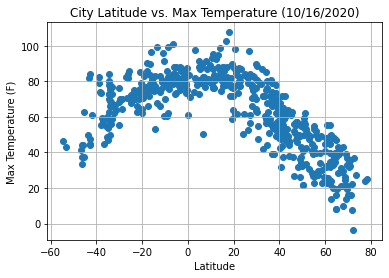

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+str(todaysdate))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temperature.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

(10/16/2020)


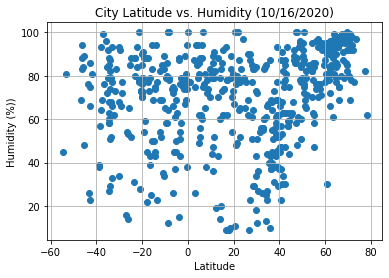

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity "+str(todaysdate))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

(10/16/2020)


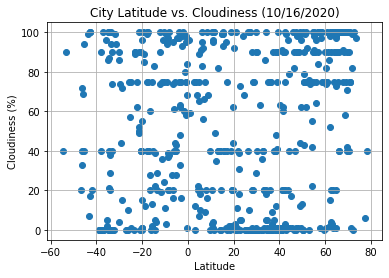

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness "+str(todaysdate))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

(10/16/2020)


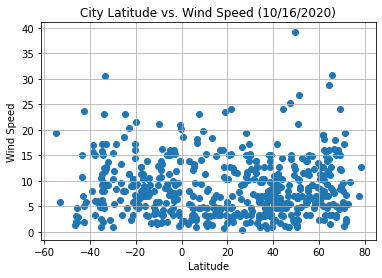

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed "+str(todaysdate))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [15]:
#Creating dataframe for southern hemisphere
southerndf=weather_data.loc[weather_data["Lat"]<0]
southerndf


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahébourg,-20.41,57.70,75.20,73,40,5.82,MU,1602862136
2,Bluff,-46.60,168.33,41.16,69,20,1.28,NZ,1602862404
3,Geraldton,-28.77,114.60,64.40,72,15,17.22,AU,1602862405
4,Mataura,-46.19,168.86,33.39,94,33,1.95,NZ,1602862406
5,Biak,-0.91,122.88,77.85,81,95,3.78,ID,1602862407
...,...,...,...,...,...,...,...,...,...
516,Tayu,-6.54,111.05,78.30,75,95,9.42,ID,1602862975
518,Luís Correia,-2.88,-41.67,87.37,58,16,15.32,BR,1602862978
522,Alyangula,-13.85,136.42,75.20,94,4,7.54,AU,1602862823
526,Kununurra,-15.77,128.73,80.60,83,13,6.93,AU,1602862986


In [16]:
#Creating dataframe for northern hemisphere
northerndf=weather_data.loc[weather_data["Lat"]>=0]
northerndf



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Tasiilaq,65.61,-37.64,42.80,93,75,3.36,GL,1602862403
7,Kadyy,57.79,43.19,39.61,76,100,4.85,RU,1602862409
9,Laas,46.62,10.70,51.01,86,40,8.05,IT,1602862412
10,Kapaa,22.08,-159.32,73.40,100,40,6.93,US,1602862413
15,Haines Junction,60.75,-137.51,23.72,90,100,5.41,CA,1602862418
...,...,...,...,...,...,...,...,...,...
521,Hindang,10.43,124.73,78.33,81,100,3.33,PH,1602862981
523,Jintūr,19.62,76.70,76.42,81,62,4.76,IN,1602862983
524,Luwero,0.85,32.47,71.08,77,59,2.04,UG,1602862984
525,Mocorito,25.48,-107.92,82.99,77,0,3.00,MX,1602862985


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

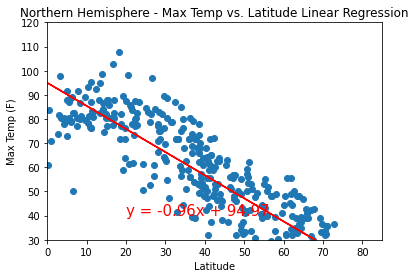

rvalue: -0.8601314939385614


<Figure size 432x288 with 0 Axes>

In [17]:
#Northern Hemisphere: max temp vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(30, 120)
plt.show()

print("rvalue: " + str(rvalue))

plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")





###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

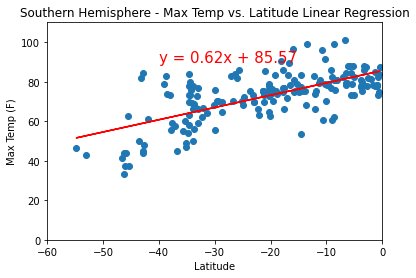

rvalue: 0.665613075163191


<Figure size 432x288 with 0 Axes>

In [18]:
#Southern Hemisphere: max temp vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-40,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

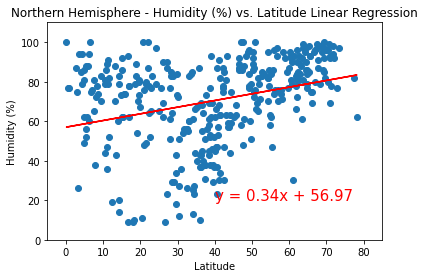

rvalue: 0.3082105186874202


<Figure size 432x288 with 0 Axes>

In [19]:
#Northern Hemisphere: humidity vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-5, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")




###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

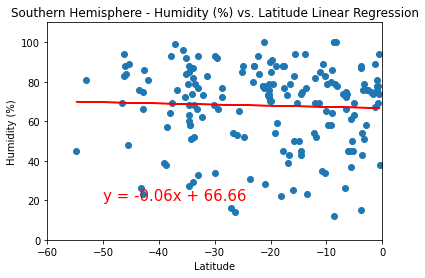

rvalue: -0.03854673885517347


<Figure size 432x288 with 0 Axes>

In [20]:
#Southern Hemisphere: humidity vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")



###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

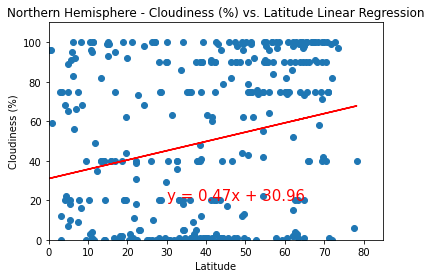

rvalue: 0.23447639650881993


<Figure size 432x288 with 0 Axes>

In [21]:
#Northern Hemisphere: cloudiness vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))

plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

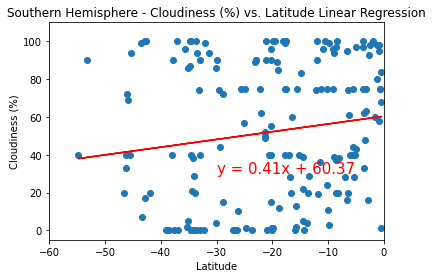

rvalue: 0.151379499058425


<Figure size 432x288 with 0 Axes>

In [22]:
#Southern Hemisphere: cloudiness vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(-60,0)
plt.ylim(-5,110)
plt.show()

print("rvalue: " + str(rvalue))

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

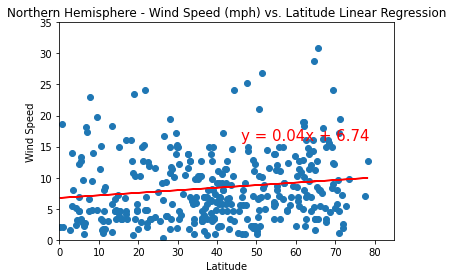

rvalue: 0.14295473118771332


<Figure size 432x288 with 0 Axes>

In [26]:
#Northern Hemisphere: wind speed vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(46,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 35)
plt.show()


print("rvalue: " + str(rvalue))

plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")




###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

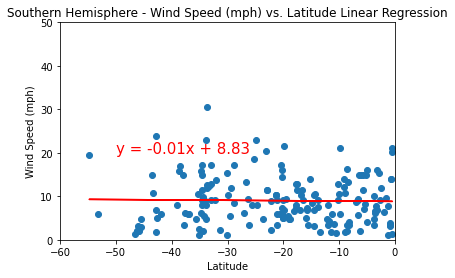

rvalue: -0.021051923735810784


<Figure size 432x288 with 0 Axes>

In [24]:
#Southern Hemisphere: wind speed vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 50)
plt.show()

print("rvalue: " + str(rvalue))

plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
